# Customer Segmentation using K-Means Clustering (Unsupervised Learning)

### Step 1: Import Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
    

### Step 2: Load Dataset

#### Download dataset from here:
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [4]:

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
df.head()
    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 3: Data Preprocessing

In [5]:

# Selecting relevant features (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 4: Finding Optimal Number of Clusters (Elbow Method)

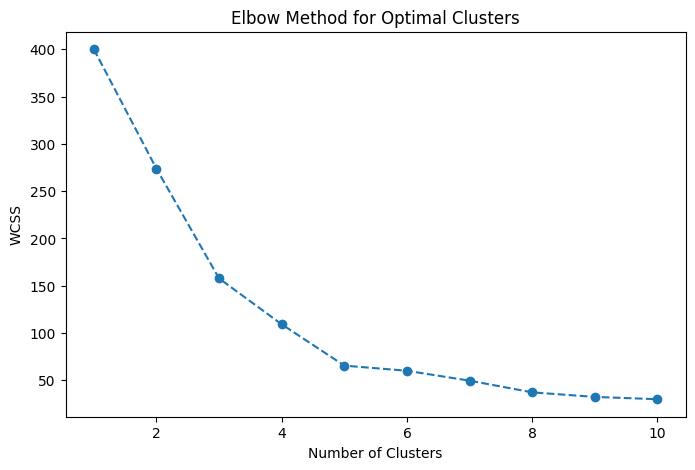

In [6]:

# Using the Elbow method to determine optimal clusters
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()
    

### Step 5: Apply K-Means Clustering

In [7]:

# Choosing optimal clusters (e.g., 5 based on elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df['Cluster'] = y_kmeans

# Display first few rows with cluster labels
df.head()
    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Step 6: Visualizing Customer Segments

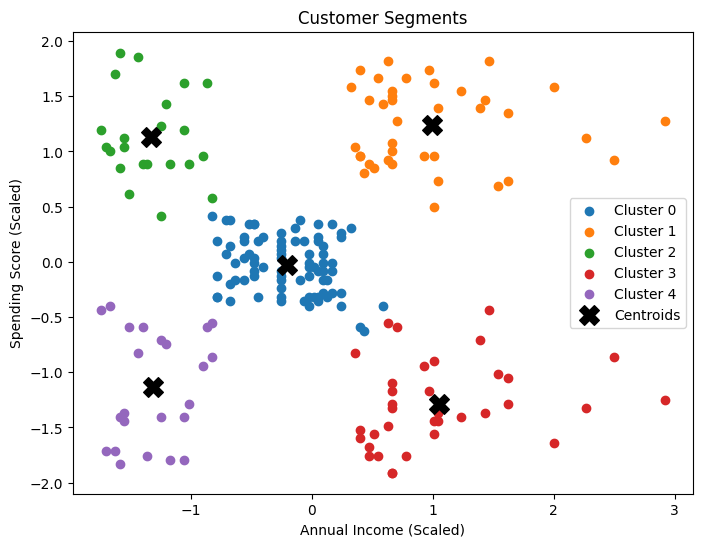

In [8]:

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Customer Segments')
plt.legend()
plt.show()
    